In [24]:
import pandas as pd
import numpy as np
import pickle
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.__version__

'1.4.2'

In [4]:
df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-01.parquet') #from nyc.gov/site/tlc/about/tlc-trip-record-data.page
#we need !pip install pyarrow

# data from: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

In [5]:
!pip install pyarrow

In [6]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0


In [7]:
import sklearn

In [8]:
sklearn.__version__

'1.0.2'

Q1: How many cloumns are there?

In [9]:
df.shape[1]

19

Q2: What's the standard deviation of the trips duration in January?

In [10]:
df["duration"] = df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]
df["month"] = df["tpep_pickup_datetime"].dt.month


In [11]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,duration,month
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,...,1.00,0.5,0.00,0.00,1.0,22.70,2.5,0.0,0 days 00:19:48,1
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,...,3.50,0.5,3.75,0.00,1.0,18.75,2.5,0.0,0 days 00:06:36,1
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,...,3.50,0.5,3.00,0.00,1.0,31.30,2.5,0.0,0 days 00:17:55,1
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,...,3.50,0.5,2.00,0.00,1.0,17.00,2.5,0.0,0 days 00:08:18,1
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,...,3.50,0.5,3.20,0.00,1.0,16.10,2.5,0.0,0 days 00:06:06,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2964619,2,2024-01-31 23:45:59,2024-01-31 23:54:36,NaN,3.18,NaN,None,107,263,0,...,0.00,0.5,2.00,0.00,1.0,21.77,NaN,NaN,0 days 00:08:37,1
2964620,1,2024-01-31 23:13:07,2024-01-31 23:27:52,NaN,4.00,NaN,None,114,236,0,...,1.00,0.5,2.34,0.00,1.0,25.74,NaN,NaN,0 days 00:14:45,1
2964621,2,2024-01-31 23:19:00,2024-01-31 23:38:00,NaN,3.33,NaN,None,211,25,0,...,0.00,0.5,0.00,0.00,1.0,23.97,NaN,NaN,0 days 00:19:00,1
2964622,2,2024-01-31 23:07:23,2024-01-31 23:25:14,NaN,3.06,NaN,None,107,13,0,...,0.00,0.5,5.58,0.00,1.0,33.46,NaN,NaN,0 days 00:17:51,1


In [12]:
aux = df.query('month == 1')
print (np.std(aux["duration"]))

0 days 00:34:51.067888974


Q3: What fraction of the records left after you dropped the outliers?


    


In [13]:
n_rows_before = df.shape[0]
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)
df = df[(df.duration >= 1) & (df.duration <= 60)]
n_rows_now = df.shape[0]
print (n_rows_now)
print (n_rows_before)

2898906
2964624


In [14]:
100-(n_rows_before-n_rows_now)/n_rows_before

99.97783260204329

Q4: What's the dimensionality of this matrix (number of columns)?




In [17]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

df[categorical] = df[categorical].astype(str)

train_dicts = df[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)


/tmp/ipykernel_22224/3057982670.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical] = df[categorical].astype(str)


In [18]:
X_train.shape

(2898906, 519)

In [19]:
X_train

<2898906x519 sparse matrix of type '<class 'numpy.float64'>'
	with 8696718 stored elements in Compressed Sparse Row format>

Q5. Do the fitting and apply the model to validation

In [20]:

target = 'duration'
y_train = df[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

mean_squared_error(y_train, y_pred, squared=False)

7.9460168727647265

/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


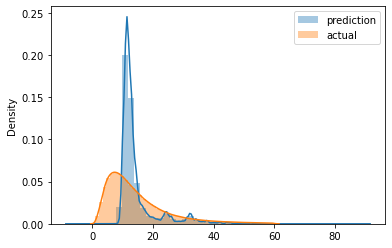

In [25]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

In [50]:
def read_dataframe(filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)

        df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)
        df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)

    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df



In [47]:
!wget 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2021-01.parquet'
!wget 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2021-02.parquet'

--2024-05-23 21:08:42--  https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2021-01.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 18.239.190.168, 18.239.190.192, 18.239.190.114, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|18.239.190.168|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21686067 (21M) [application/x-www-form-urlencoded]
Saving to: ‘yellow_tripdata_2021-01.parquet’

yellow_tripdata_202 100%[===================>]  20.68M  57.1MB/s    in 0.4s    

2024-05-23 21:08:43 (57.1 MB/s) - ‘yellow_tripdata_2021-01.parquet’ saved [21686067/21686067]

--2024-05-23 21:08:43--  https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2021-02.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 18.239.190.192, 18.239.190.168, 18.239.190.224, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|18.239.190.192|:443...

In [51]:
df_train = read_dataframe('yellow_tripdata_2021-01.parquet')
df_val = read_dataframe('yellow_tripdata_2021-02.parquet')

In [52]:
len(df_train), len(df_val)


(1343254, 1340859)

In [53]:
df_train.isna().any()


VendorID                 False
tpep_pickup_datetime     False
tpep_dropoff_datetime    False
passenger_count           True
trip_distance            False
RatecodeID                True
store_and_fwd_flag        True
PULocationID             False
DOLocationID             False
payment_type             False
fare_amount              False
extra                    False
mta_tax                  False
tip_amount               False
tolls_amount             False
improvement_surcharge    False
total_amount             False
congestion_surcharge      True
airport_fee               True
duration                 False
dtype: bool

In [54]:
df_val.isna().any()

VendorID                 False
tpep_pickup_datetime     False
tpep_dropoff_datetime    False
passenger_count           True
trip_distance            False
RatecodeID                True
store_and_fwd_flag        True
PULocationID             False
DOLocationID             False
payment_type             False
fare_amount              False
extra                    False
mta_tax                  False
tip_amount               False
tolls_amount             False
improvement_surcharge    False
total_amount             False
congestion_surcharge      True
airport_fee               True
duration                 False
dtype: bool

In [55]:
df_train['PU_DO'] = df_train['PULocationID'] + '_' + df_train['DOLocationID']
df_val['PU_DO'] = df_val['PULocationID'] + '_' + df_val['DOLocationID']

In [56]:
categorical = ['PU_DO'] #'PULocationID', 'DOLocationID']
numerical = ['trip_distance']

dv = DictVectorizer()

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [57]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [58]:

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

4.918092873194028